<a href="https://colab.research.google.com/github/AlejandroLopez105/Computacion3/blob/master/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computación III -Unidad I
+ Autor : Miguel Alejandro López Olvera
+ Contacto: alexander_105@live.com 
+ 05-10-2020

#Optimización en una dimensión
+ Búsqueda exhaustiva
+ Método de Newton 
+ Método de la sección aurea 



#Clase Optimización 
+ Búsqueda exhaustiva
+ Método de Newton
+ Método de la sección aurea


In [16]:
class Optimization:
  def __init__(self,func, tol,maxIter):
    self.tol = tol
    self.maxIter = maxIter
    self.func = func

  def Exhaustive_search(self, inicio, fin):
    x_a = np.arange(inicio,fin+1)
    y_a = np.zeros(len(x_a))
    y_a_muestreo = np.zeros(9)
    max = -99999999
    min = 999999999
    index_min = 0
    index_max = 0
    for i in x_a:
      y_a[i] = self.func.subs(x,x_a[i])
      a=0.1
      if(y_a[i]<min):
        min = y_a[i]
        index_min = x_a[i]
      for j in range(9):
        subs = x_a[i]+a
        y_a_muestreo[j] = self.func.subs(x,subs)
        if(y_a_muestreo[j] > max):
          max = y_a_muestreo[j]
          index_max = subs
        if(y_a_muestreo[j] < min):
          min = y_a_muestreo[j]
          index_min = subs
        a+=0.1
    return min,max,index_min,index_max
  def Newton_method(self, der1, der2):
    #valor inicial
    x_1 = float(1)
    #inicializar error (delta)
    error = 99999#valor inicial para el error, se actualizará en el ciclo
    count = 0
    start_time_Newton = time()
    while self.tol<error and count <self.maxIter:
      #Xk1 = xk - eval(f'(xf))/eval(f''(xk))
      x_2 = x_1 - (der1.subs(x,x_1)/der2.subs(x,x_1))
      #error = abs(actual-anterior)
      error = abs(x_1-x_2)
      #count += 1
      count += 1
      #xk =Xk1
      x_1 = x_2
    return x_1

  def Golden_ratio_method(self, x_l, x_u):
    prop = (float(sqrt(5))-1)/2
    conteo=0
    while(abs(x_u-x_l) > self.tol and conteo<self.maxIter):
      d = prop*(x_u-x_l)
      x_1 = x_l + d
      x_2 = x_u - d
      eval_x1 = self.func.subs(x,x_1)
      eval_x2 = self.func.subs(x,x_2)

      if(eval_x1 < eval_x2):
        x_l = x_2
        x_2 = x_1
        x_1 = x_l + (prop*(x_u-x_l))
      elif(eval_x2 < eval_x1):
        x_u = x_1
        x_1 = x_2
        x_2 = x_u - (prop*(x_u-x_l))
      conteo+=1
    return x_1

#Graficación de métodos y puntos


In [17]:
class Graph:
  def __init__(self,func):
    self.func = func

  def PlotFunction(self,inicio,fin):
    x_a = np.linspace(-1, 2.5, 10000)
    y_a = np.zeros(len(x_a))

    for i in range(len(x_a)):
      y_a[i] = self.func.subs(x, x_a[i])
    plt.title("Búsqueda Exhaustiva")
    plt.xlabel("Variable independiente")
    plt.ylabel("Variable dependiente")
    # Generar gráfico usando x_a y y_a
    plt.plot(x_a, y_a, label = self.func)
    # Desplegar lyenda
    plt.legend(loc = 'best')

  def plotPoint(self,x,y,legend,color, mark):
    plt.scatter(x, y, label = legend, c = color, marker = mark)
    plt.legend(loc= "best")

  def saveFigure(self, title, quality):
    plt.savefig(title, dpi = quality, bbox_inches = 'tight')

#Definición de método Main

Exhaustive search: 2.1
	 Time: 1.4157764911651611

Newton method: 0.540876746658062
	 Time: 0.0038192272186279297

Golden search method: 2.140901060233582
	 Time: 0.02866649627685547



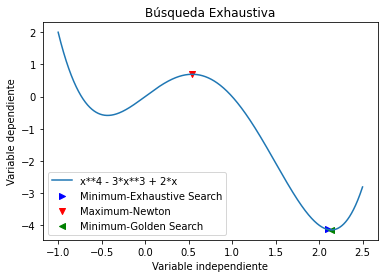

In [22]:
from sympy import *
import matplotlib.pyplot as plt
from sympy.abc import x, y
import numpy as np
import matplotlib
from time import time
import matplotlib.pyplot as plt
#habilitar impresión avanzada con latex
init_printing(use_latex='mathjax')

def main():
  func = x**4-3*x**3+2*x
  #func=x**2 + 2*x
  tol = 0.0001
  maxIter = 1000
  inicio = -100
  fin = 100

  der1 = diff(func)
  der2 = diff(der1)

  objOpt = Optimization(func, tol, maxIter)

  start_time_ES = time()
  min,max,index_min,index_max = objOpt.Exhaustive_search(inicio,fin)
  time_ES = time()-start_time_ES

  start_Newton = time()
  x_1_newton = objOpt.Newton_method(der1,der2)
  time_Newton = time() - start_Newton

  start_Golden = time()
  x_1_golden = objOpt.Golden_ratio_method(inicio, fin)
  time_Golden_ratio = time() - start_Golden

  print("Exhaustive search: " + str(index_min))
  print("\t Time: " + str(time_ES) + "\n")
  print("Newton method: " + str(x_1_newton))
  print("\t Time: " + str(time_Newton) + "\n")
  print("Golden search method: " + str(x_1_golden))
  print("\t Time: " + str(time_Golden_ratio) + "\n")

  objGraph = Graph(func)
  objGraph.PlotFunction(inicio,fin)

  minOrMax_Newton = der2.subs(x,x_1_newton)
  minOrMax_Golden = der2.subs(x,x_1_golden)

  if(der1.subs(x,index_min) < tol):#almost 0
    objGraph.plotPoint(index_min, min, "Minimum-Exhaustive Search", "b", ">")
  elif(der1.subs(x,index_max) < tol):#almost 0
    objGraph.plotPoint(index_max, max, "Maximum-Exhaustive Search", "b",">")

  if(minOrMax_Newton > 0):
    objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Minimum-Newton", "r","v")
  elif(minOrMax_Newton < 0):
    objGraph.plotPoint(x_1_newton, func.subs(x,x_1_newton), "Maximum-Newton", "r","v")

  if(minOrMax_Golden > 0):
    objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Minimum-Golden Search", "g","<")
  elif(minOrMax_Golden < 0):
    objGraph.plotPoint(x_1_golden, func.subs(x,x_1_golden), "Maximum-Golden Search", "g","<")
  
  #objGraph.saveFigure("Optimization",300)

if __name__ == "__main__":
  main()